In [1]:
import os
print(os.sys.path)

['/home/hp/Desktop/machine_learning/anaconda_3_projects/VIT_hack', '/home/hp/anaconda3/lib/python38.zip', '/home/hp/anaconda3/lib/python3.8', '/home/hp/anaconda3/lib/python3.8/lib-dynload', '', '/home/hp/anaconda3/lib/python3.8/site-packages', '/home/hp/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/hp/.ipython']


In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pytesseract

In [452]:
import re

In [294]:
img_0 = cv2.imread("certificate_light_text.png")

In [534]:
img_1 = cv2.imread("Certificate_dark_text.png")

In [296]:
img_2 = cv2.imread("simple_b_w.jpg")

In [605]:
img_3 = cv2.imread("simple_b_w_certificate.jpg")

In [459]:
user_name = "atishay"
user_email = "atishaysjain@gmail.com"
user_event = "VIT_Hack"
user_year = "2020"
user_certificate_id = "ABC123"
user_award = "20K_INR"
project_title = "Certificate_generator"

In [460]:
user_input = {"Name" : user_name, 
              "Email" : user_email, 
              "Event" : user_event, 
              "Year" : user_year, 
              "Certificate_id" : user_certificate_id,
              "Award" : user_award,
              "Project_title" : project_title}

In [618]:
cv2.imshow("image", img_3)
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

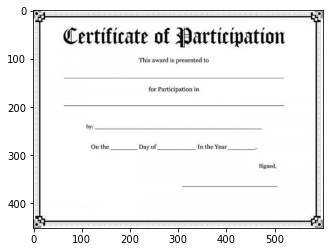

In [540]:
plt.imshow(img_3)

### Thresholding

In [111]:
# Inverse binary threshold
ret, thresh_inv = cv2.threshold(img_0,100,255,cv2.THRESH_BINARY_INV)
#cv2.imshow(thresh1, cmap = "gray")

In [ ]:
# Binary threshold
ret, thresh1 = cv2.threshold(img_1,100,255,cv2.THRESH_BINARY)

### Preprocessing

In [607]:
# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format
img_3  = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB) 

### Text

In [269]:
text = pytesseract.image_to_string(img_3)

In [270]:
print(text)

Certificate of Participation

‘This award is presented to

for Participation in

 



### Shape of the image

In [325]:
himg, wimg, _ = img_3.shape

In [326]:
print(img_3.shape)

(451, 600, 3)


### Co-ordinates of lettres

In [327]:
def lettres_coordinates_boxes_text(img):
    boxes = pytesseract.image_to_boxes(img)
    for b in boxes.splitlines():
        b = b.split(" ")
        x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
        cv2.rectangle(img, (x,himg - y), (w, himg - h), (0, 0, 255), 1) # Adding boxes
        cv2.putText(img, b[0], (x, himg-y+5), cv2.FONT_HERSHEY_COMPLEX, 0.4, (50, 50, 255), 1) # Adding text
    cv2.imshow("image", img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    return boxes

In [328]:
boxes_lettres = lettres_coordinates_boxes_text(img_3)

In [304]:
print(boxes_lettres)

C 63 380 76 415 0
e 76 380 92 415 0
r 94 381 108 406 0
t 110 381 126 406 0
i 129 381 139 411 0
f 142 381 150 415 0
i 154 381 175 415 0
c 177 381 188 406 0
a 190 381 203 406 0
t 210 381 218 411 0
e 223 381 238 406 0
o 252 381 265 406 0
f 271 381 283 414 0
P 295 373 318 415 0
a 318 373 329 415 0
r 339 381 349 406 0
t 354 381 366 406 0
i 367 381 380 411 0
c 386 381 405 415 0
i 405 381 405 406 0
p 418 373 433 415 0
a 437 381 448 406 0
t 448 381 455 406 0
i 460 381 480 414 0
o 481 381 497 406 0
n 500 381 521 406 0
‘ 600 0 600 0 0
T 219 343 223 352 0
h 225 349 227 352 0
i 229 343 233 352 0
s 235 343 243 349 0
a 247 343 250 349 0
w 253 343 259 349 0
a 260 343 264 349 0
r 265 343 267 349 0
d 269 343 277 352 0
i 284 343 285 349 0
s 285 343 292 349 0
p 296 340 300 349 0
r 300 340 302 349 0
e 306 343 310 349 0
s 310 343 313 349 0
e 316 343 322 349 0
n 322 343 325 349 0
t 327 343 331 349 0
e 333 343 341 351 0
d 343 343 349 352 0
t 353 343 356 351 0
o 357 343 364 349 0
f 600 0 600 0 0
o 240 283 244

### Co-ordinates of words

In [530]:
def words_coordinates_boxes_text(img):
    boxes_2 = pytesseract.image_to_data(img)
    words_data = [] 
    for count, b in enumerate(boxes_2.splitlines()):
        if count != 0:
            b = b.split()
            if len(b) == 12:
                words_data.append(list(b))
                print(b)
                x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
                cv2.rectangle(img, (x,y), (w+x, y+h), (255, 0, 0), 1)
    cv2.imshow("image", img)
    cv2.waitKey(0) 
    cv2.destroyAllWindows()
    return words_data

In [531]:
boxes_words = words_coordinates_boxes_text(img_3)

['5', '1', '1', '1', '1', '1', '63', '36', '175', '35', '91', 'Certificate']
['5', '1', '1', '1', '1', '2', '252', '37', '31', '33', '96', 'of']
['5', '1', '1', '1', '1', '3', '295', '36', '226', '42', '47', 'Participation']
['5', '1', '2', '1', '1', '1', '219', '99', '24', '9', '92', '‘This']
['5', '1', '2', '1', '1', '2', '247', '99', '33', '9', '96', 'award']
['5', '1', '2', '1', '1', '3', '284', '102', '8', '6', '96', 'is']
['5', '1', '2', '1', '1', '4', '296', '99', '53', '12', '96', 'presented']
['5', '1', '2', '1', '1', '5', '353', '100', '11', '8', '96', 'to']
['5', '1', '3', '1', '1', '1', '240', '159', '15', '9', '91', 'for']
['5', '1', '3', '1', '1', '2', '259', '159', '70', '12', '91', 'Participation']
['5', '1', '3', '1', '1', '3', '333', '162', '10', '6', '93', 'in']


In [491]:
boxes_words

[['5', '1', '1', '1', '1', '1', '63', '36', '175', '35', '91', 'Certificate'],
 ['5', '1', '1', '1', '1', '2', '252', '37', '31', '33', '96', 'of'],
 ['5',
  '1',
  '1',
  '1',
  '1',
  '3',
  '295',
  '36',
  '226',
  '42',
  '47',
  'Participation'],
 ['5', '1', '2', '1', '1', '1', '219', '99', '24', '9', '92', '‘This'],
 ['5', '1', '2', '1', '1', '2', '247', '99', '33', '9', '96', 'award'],
 ['5', '1', '2', '1', '1', '3', '284', '102', '8', '6', '96', 'is'],
 ['5', '1', '2', '1', '1', '4', '296', '99', '53', '12', '96', 'presented'],
 ['5', '1', '2', '1', '1', '5', '353', '100', '11', '8', '96', 'to'],
 ['5', '1', '3', '1', '1', '1', '240', '159', '15', '9', '91', 'for'],
 ['5',
  '1',
  '3',
  '1',
  '1',
  '2',
  '259',
  '159',
  '70',
  '12',
  '91',
  'Participation'],
 ['5', '1', '3', '1', '1', '3', '333', '162', '10', '6', '93', 'in']]

In [447]:
words_certificate = [] # List of all the words in certificate
for count, i in enumerate(boxes_words):
    words_certificate.append([count, str(boxes_words[count]).split(",")[-1][2:-2]])

In [448]:
words_certificate

[[0, 'Certificate'],
 [1, 'of'],
 [2, 'Participation'],
 [3, '‘This'],
 [4, 'award'],
 [5, 'is'],
 [6, 'presented'],
 [7, 'to'],
 [8, 'for'],
 [9, 'Participation'],
 [10, 'in']]

In [476]:
words_name = ["To", "Name"]

words_event = ["Event", "Regards", "by", "Organzation"]

words_date = ["Date", "Day", "day", "year", "of", "occasion", "in"]
               
words_email = ["Email", "address", "gmail"]

words_award = ["award", "the", "felicitated"]

words_project_title = ["project", "title", "on"]

words_certificate_id = ["id", "code", "link", "verification"]

In [457]:
words_corpus = {"Name" : words_name, "Event" : words_event, "Year" : words_date,
                "Email" : words_email, "Award" : words_award, 
                "Project_title" : words_project_title, 
                "Certificate_id" : words_certificate_id}

In [460]:
user_input = {"Name" : user_name, 
              "Email" : user_email, 
              "Event" : user_event, 
              "Year" : user_year, 
              "Certificate_id" : user_certificate_id,
              "Award" : user_award,
              "Project_title" : project_title}

In [480]:
def words_insert(words_certificate, words_corpus, user_input):
    match = []
    for w_c in words_certificate:
        index_word, wc = w_c
        for key, value in words_corpus.items():
            for k in value:
                if(wc.casefold() == k.casefold()): 
                #if(re.search(wc.casefold(), k.casefold()) or re.search(k.casefold(), wc.casefold())):
    #match(index_of_word_in_boxes_2, word_in_certificate, name_to_be_added_in_certificate)   
                    match.append([index_word, wc, user_input[key]]) 
                    break
    return match    

In [481]:
match = words_insert(words_certificate, words_corpus, user_input)

In [497]:
np.array(match)

array([['1', 'of', '2020'],
       ['4', 'award', '20K_INR'],
       ['7', 'to', 'atishay']], dtype='<U21')

In [525]:
def get_coordinates(match, boxes_words, himg):
    coordinates = []
    indexes = np.array(match)[:,0]
    for i in range(0, len(indexes)):
        x, y, w, h = boxes_words[int(indexes[i])][6:10]
        x = int(x)
        y = int(y)
        w = int(w)
        h = int(h)
        coordinates.append([x+w+(int(himg)/25), y+h, match[i][-1]])
    return coordinates

In [526]:
coordinates_word = get_coordinates(match, boxes_words, himg)

In [527]:
coordinates_word

[[301.04, 70, '2020'], [298.04, 108, '20K_INR'], [382.04, 108, 'atishay']]

### Line detection

In [608]:
img_3_edges = cv2.Canny(img_3_gray, 50, 50) # Just put (50, 150) values for now

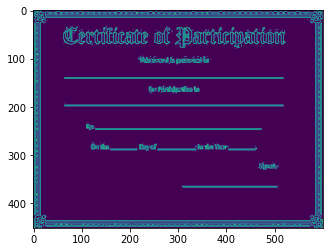

In [609]:
plt.imshow(img_3_edges)

In [610]:
lines = cv2.HoughLinesP(img_2_edges, 1, np.pi/180, 150)

In [611]:
def horizontal_lines(lines):
    line_test = np.array(lines).reshape(lines.shape[0], lines.shape[-1])
    np_x_index = np.where(line_test[:,1] == line_test[:,3])
    line_test = line_test[np_x_index]
    lines_test_pd = pd.DataFrame(line_test).rename(columns = {0: "x1", 1 : "y1", 2 : "x2", 3 : "y2"})
    lines_test_pd.sort_values(by = "y1", inplace = True)
    lines_x = np.array(lines_test_pd)
    return lines_x

In [612]:
lines_x = horizontal_lines(lines)

In [569]:
pd.DataFrame(lines_x) # shape :- (2234, 4)

,0,1,2,3
0,153,76,188,76
1,206,76,252,76
2,107,78,132,78
3,257,78,296,78
4,249,117,261,117
5,34,117,63,117
6,383,117,383,117
7,170,117,172,117
8,210,117,234,117
9,77,117,93,117


In [613]:
# Horizontal lines which are longer than 5% of the total width
lines_x_long = lines_x[np.where((lines_x[:,2] - lines_x[:,0])/wimg > 0.05)]

In [614]:
# Returning lines which are not in the outer 5% of the image
def filter_lines(lines_x_long, wimg, himg):
    x1_thresh = 0.05 * wimg
    y1_thresh = 0.05 * himg
    x2_thresh = 0.95 * wimg
    y2_thresh = 0.95 * himg
    x1_lines = lines_x_long[:,0]
    y1_lines = lines_x_long[:,1]
    x2_lines = lines_x_long[:,2]
    y2_lines = lines_x_long[:,3]
    index_lines = np.where((x1_lines > x1_thresh) & (y1_lines > y1_thresh) & (x2_lines < x2_thresh) & (y2_lines < y2_thresh))
    lines_x_filtered = lines_x_long[index_lines]
    return lines_x_filtered

In [615]:
lines_x_filtered = filter_lines(lines_x, wimg, himg)

In [620]:
pd.DataFrame(lines_x_filtered)

,0,1,2,3
0,153,76,188,76
1,206,76,252,76
2,107,78,132,78
3,257,78,296,78
4,249,117,261,117
5,34,117,63,117
6,383,117,383,117
7,170,117,172,117
8,210,117,234,117
9,77,117,93,117


In [617]:
for line in lines_x_filtered:
    x1, y1, x2, y2 = line
    cv2.line(img_3, (x1, y1), (x2, y2), (0, 255, 0), 1)

In [621]:
mid_point_lines_x = (lines_x_filtered[0] + lines_x_filtered[2])/2 
mid_point_lines_y = lines_x_filtered[1]